# Gabor Model Logic

The Gabor model function is given as:

$$f(x,\phi) = sin(\phi_0+0.06 \cdot \phi_1 \cdot x) \cdot \exp(-\frac{(\phi_0+0.06 \cdot \phi_1 \cdot x)^2}{32.0})$$

where:
- $x$: the input
- $\phi = [\phi_0,\phi_1]^T$: a vector of parameters

The $\phi_0$ parameter determines the mean position of the function along the x-axis, and $\phi_1$ affects the stretch or squeeze of the function along the x-axis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
def GaborModel(sample:np.ndarray,phiValues:np.ndarray)->np.ndarray:
  phi_0,phi_1 = phiValues
  return np.sin(phi_0+0.06*phi_1*sample)*np.exp(-((phi_0+0.06*phi_1*sample)**2)/32.0)

In [3]:
def LossFunction(phiValues:np.ndarray,sample:np.ndarray,groundTruth:np.ndarray)->int|float:
  predictions = GaborModel(sample,phiValues)
  return np.sum((predictions-groundTruth)**2)

In [4]:
sample = np.linspace(0,10,100)
groundTruth = np.sin(sample)*np.exp(-(sample**2)/32.0)+np.random.normal(0,0.1,sample.shape)
print(f"Sample shape: {sample.shape}")
print(f"Ground truth shape: {groundTruth.shape}")

Sample shape: (100,)
Ground truth shape: (100,)


In [5]:
phiInitial = np.array([0.0,1.0])

- The `minimize` function is a general-purpose optimization routine that can minimize a scalar function of one or more variables using a variety of algorithms, such as BFGS, Nelder-Mead simplex, Newton Conjugate Gradient, COBYLA, or SLSQP.

In [12]:
def ExampleBaseFunction(value:int|float)->int|float:
  return (value-3)**2

In [13]:
x_0 = [10]
resultExample = minimize(ExampleBaseFunction,x_0)
print(resultExample)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 7.451631553407712e-17
        x: [ 3.000e+00]
      nit: 3
      jac: [-2.363e-09]
 hess_inv: [[ 5.000e-01]]
     nfev: 8
     njev: 4


In [14]:
print(f"Optimal Value of x: {resultExample.x}")
print(f"Minimum value of function: {resultExample.fun}")

Optimal Value of x: [2.99999999]
Minimum value of function: 7.451631553407712e-17


In [6]:
result = minimize(LossFunction,phiInitial,args=(sample,groundTruth))
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 14.187427105067009
        x: [ 4.174e-01 -1.029e+00]
      nit: 7
      jac: [-9.537e-07 -4.768e-07]
 hess_inv: [[ 2.102e-02 -5.254e-02]
            [-5.254e-02  1.753e-01]]
     nfev: 27
     njev: 9


In [7]:
phiOptimized = result.x
print(f"Optimized Phi:\n{phiOptimized}")

Optimized Phi:
[ 0.41735832 -1.02940643]


In [10]:
groundInitial = GaborModel(sample,phiInitial)
print(f"Ground Initial shape: {groundInitial.shape}")
groundOptimized = GaborModel(sample,phiOptimized)
print(f"Ground Optimized shape: {groundOptimized.shape}")

Ground Initial shape: (100,)
Ground Optimized shape: (100,)


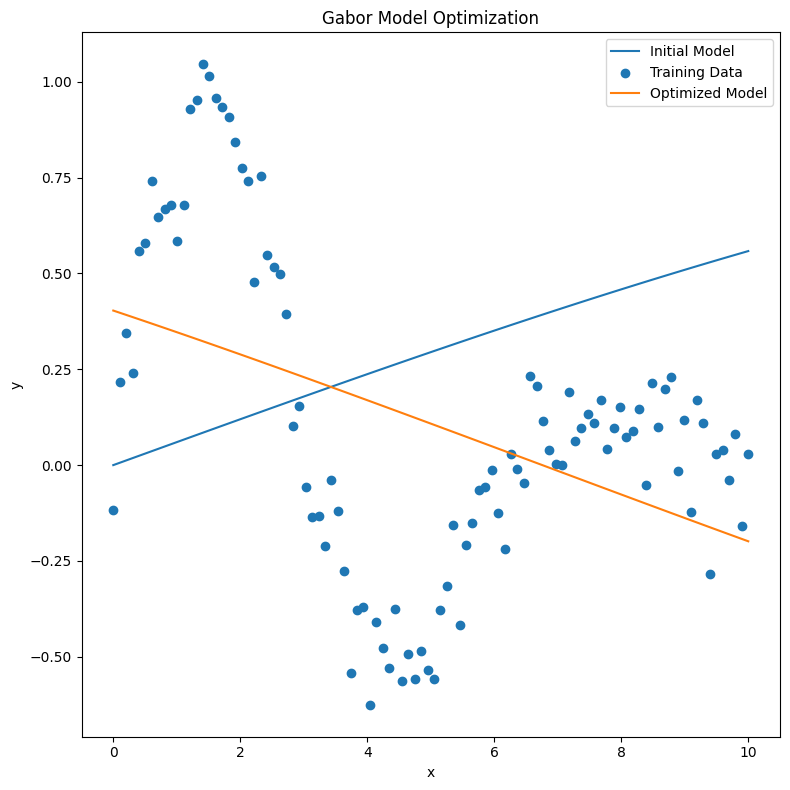

In [11]:
plt.figure(figsize=(8,8))
plt.title("Gabor Model Optimization")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(sample,groundInitial,label="Initial Model")
plt.scatter(sample,groundTruth,label="Training Data")
plt.plot(sample,groundOptimized,label="Optimized Model")
plt.legend()
plt.tight_layout()
plt.show()
